In [1]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pylab as plt

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.pyplot as plt

In [2]:
df_051 = pd.read_excel('dataset/051.xlsx')
# df_101 = pd.read_excel('dataset/101.xlsx')
# df_102 = pd.read_excel('dataset/102.xlsx')
# df_103 = pd.read_excel('dataset/103.xlsx')
# df_161 = pd.read_excel('dataset/161.xlsx')
# df_162 = pd.read_excel('dataset/162.xlsx')
# df_162 = pd.read_excel('dataset/162.xlsx')

In [3]:
df_copy1 = df_051.copy()
df_copy2 = df_051.copy()

In [4]:
df_copy1.describe(include="all")

,timestamp,x,y,z,label
count,5.200000e+03,5200.000000,5200.000000,5200.000000,5200.000000
mean,1.657093e+12,-0.770769,246.844423,37.432500,0.500000
std,6.005020e+04,8.426946,9.207793,10.517796,0.500048
min,1.657093e+12,-88.000000,189.000000,-41.000000,0.000000
25%,1.657093e+12,-3.000000,244.000000,35.000000,0.000000
50%,1.657093e+12,0.000000,247.000000,37.000000,0.500000
75%,1.657093e+12,1.000000,251.000000,40.000000,1.000000
max,1.657094e+12,190.000000,394.000000,352.000000,1.000000


## Analisis Statistical
<li> rentang nilai dari sumbu x, -88 sampai 190
<li> rentang nilai dari sumbu y, 189 sampai 394
<li> rentang nilai dari sumbu y, -41 sampai 352
<br><br>
seharusnya mencari rata-rata, median, std tidak diperbolehkan terdapat nilai yang negatif. Nilai negatif ini adalah posisi letak sumbu x,y,z yang memungkinkan nilai menjadi negatif. Maka, akan dilakukan perhitungan ulang dengan menambahkan absolute 

In [5]:
# Calculate the mean, median, and standard deviation for each axis
mean_x = np.mean(abs(df_copy2['x']))
mean_y = np.mean(abs(df_copy2['y']))
mean_z = np.mean(abs(df_copy2['z']))

median_x = np.median(abs(df_copy2['x']))
median_y = np.median(abs(df_copy2['y']))
median_z = np.median(abs(df_copy2['z']))

std_x = np.std(abs(df_copy2['x']))
std_y = np.std(abs(df_copy2['y']))
std_z = np.std(abs(df_copy2['z']))

In [6]:
# Print the results
print('Axis X: Mean = {:.2f}, Median = {:.2f}, Standard Deviation = {:.2f}'.format(mean_x, median_x, std_x))
print('Axis Y: Mean = {:.2f}, Median = {:.2f}, Standard Deviation = {:.2f}'.format(mean_y, median_y, std_y))
print('Axis Z: Mean = {:.2f}, Median = {:.2f}, Standard Deviation = {:.2f}'.format(mean_z, median_z, std_z))


Axis X: Mean = 4.63, Median = 2.00, Standard Deviation = 7.08
Axis Y: Mean = 246.84, Median = 247.00, Standard Deviation = 9.21
Axis Z: Mean = 37.49, Median = 37.00, Standard Deviation = 10.33


<li> sumbu x, mempunyai rata-rata 4.63, median 2, dan simpangan bakunya 7.08
<li> sumbu y, mempunyai rata-rata 246.84, median 247, dan simpangan bakunya 9.21
<li> sumbu z, mempunyai rata-rata 37.49, median 37.00, dan simpangan bakunya 10.33

In [7]:
df_copy2

,timestamp,x,y,z,label
0,1657093314320,3,239,34,1
1,1657093314360,9,247,30,1
2,1657093314400,8,252,31,1
3,1657093314440,0,255,37,1
4,1657093314480,-12,252,39,1
...,...,...,...,...,...
5195,1657093522120,1,248,38,0
5196,1657093522160,0,248,37,0
5197,1657093522200,-1,248,38,0
5198,1657093522240,-2,248,37,0


In [8]:
df_copy1['timestamp'] = pd.to_datetime(df_copy1['timestamp'], unit='ms')

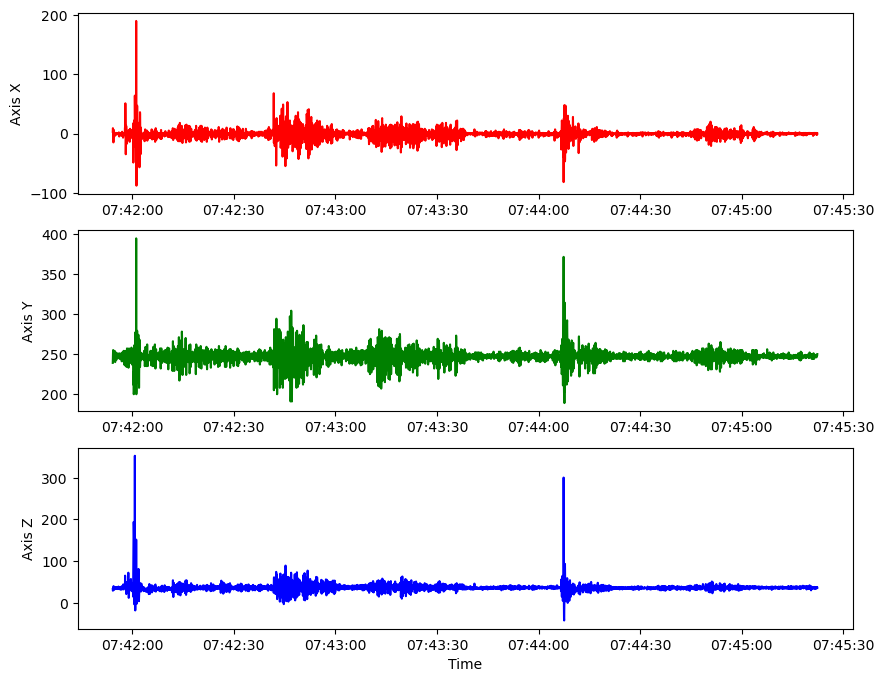

In [9]:
# Convert timestamp to datetime
#df_copy1['timestamp'] = pd.to_datetime(df_copy1['timestamp'], unit='ms')

# Set timestamp as index
df_copy1 = df_copy1.set_index('timestamp')

# Create a plot of acceleration data
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
axs[0].plot(df_copy1['x'], 'r')
axs[0].set_ylabel('Axis X')
axs[1].plot(df_copy1['y'], 'g')
axs[1].set_ylabel('Axis Y')
axs[2].plot(df_copy1['z'], 'b')
axs[2].set_ylabel('Axis Z')
axs[2].set_xlabel('Time')

# Display the plot
plt.show()

In [14]:
# Calculate the rolling mean for each axis
df_copy2['x_mean'] = df_copy2['x'].rolling(window=30).mean()
df_copy2['y_mean'] = df_copy2['y'].rolling(window=30).mean()
df_copy2['z_mean'] = df_copy2['z'].rolling(window=30).mean()


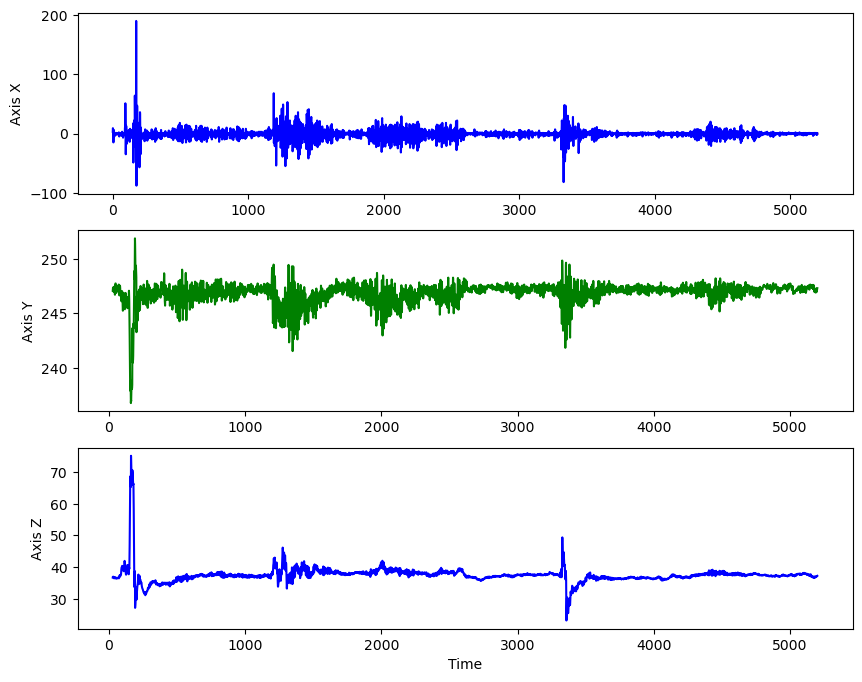

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
axs[0].plot(df_copy2['x_mean'], 'r')
axs[0].plot(df_copy2['x'], 'b')
axs[0].set_ylabel('Axis X')
axs[1].plot(df_copy2['y_mean'], 'g')
axs[1].set_ylabel('Axis Y')
axs[2].plot(df_copy2['z_mean'], 'b')
axs[2].set_ylabel('Axis Z')
axs[2].set_xlabel('Time')

# Display the plot
plt.show()